In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_json("data/alert_data.json")
df

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True
...,...,...,...,...,...,...,...,...,...,...
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9997,OpsRamp agent is offline,Ok,2,P0,1140,Compute,Operating System,Connectivity,Opsramp Cloud Connectivity,False
9998,[Cleared] cca02ris001.cc.nwncloud.com: cca02ri...,Ok,2,P0,58,Others,Others,Others,Others,True


In [3]:
df.columns

Index(['subject', 'currentState', 'repeatCount', 'priority', 'healTime',
       'alertClass', 'alertSubClass', 'alertCategory', 'alertSubCategory',
       'alert_autoheal'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subject           10000 non-null  object
 1   currentState      10000 non-null  object
 2   repeatCount       10000 non-null  int64 
 3   priority          10000 non-null  object
 4   healTime          10000 non-null  int64 
 5   alertClass        10000 non-null  object
 6   alertSubClass     10000 non-null  object
 7   alertCategory     10000 non-null  object
 8   alertSubCategory  10000 non-null  object
 9   alert_autoheal    10000 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 713.0+ KB


In [5]:
df.describe()

,repeatCount,healTime
count,10000.000000,10000.000000
mean,2.137800,1705.875400
std,0.535014,5683.926477
min,2.000000,1.000000
25%,2.000000,240.000000
50%,2.000000,540.000000
75%,2.000000,900.000000
max,10.000000,76320.000000


In [6]:
df.isnull().sum()

subject             0
currentState        0
repeatCount         0
priority            0
healTime            0
alertClass          0
alertSubClass       0
alertCategory       0
alertSubCategory    0
alert_autoheal      0
dtype: int64

In [7]:
df["currentState"].value_counts()

Ok    10000
Name: currentState, dtype: int64

In [8]:
dd = df["repeatCount"].value_counts()
dd

2     9100
3      620
4      177
5       44
6       43
8        9
10       3
7        3
9        1
Name: repeatCount, dtype: int64

In [9]:
df["priority"].value_counts()

P1    5052
P2    2793
P0    1460
P3     695
Name: priority, dtype: int64

<AxesSubplot:xlabel='priority', ylabel='count'>

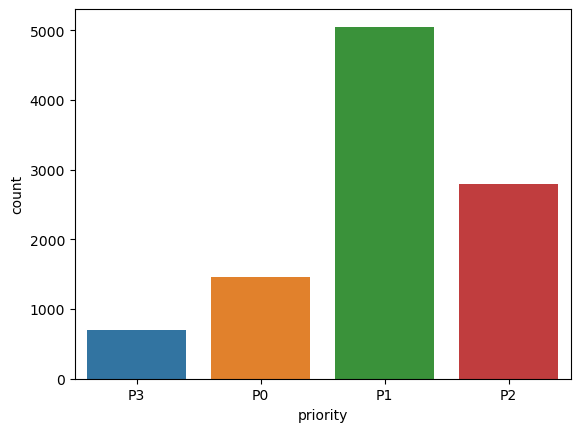

In [10]:
sns.countplot(x=df["priority"])

In [11]:
df["healTime"].value_counts()

540      1365
240      1110
300       998
900       722
60        607
         ... 
20820       1
4620        1
34140       1
7020        1
8280        1
Name: healTime, Length: 328, dtype: int64

<AxesSubplot:ylabel='Density'>

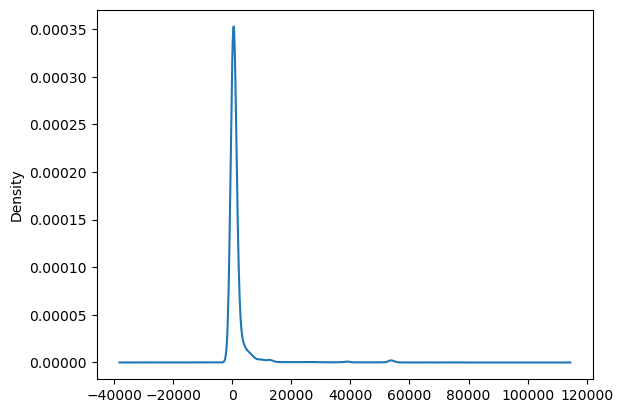

In [12]:
# plot distribution of values in Marks column
df["healTime"].plot(kind='kde')

/tmp/ipykernel_850048/3356269219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['healTime'])


<AxesSubplot:xlabel='healTime', ylabel='Density'>

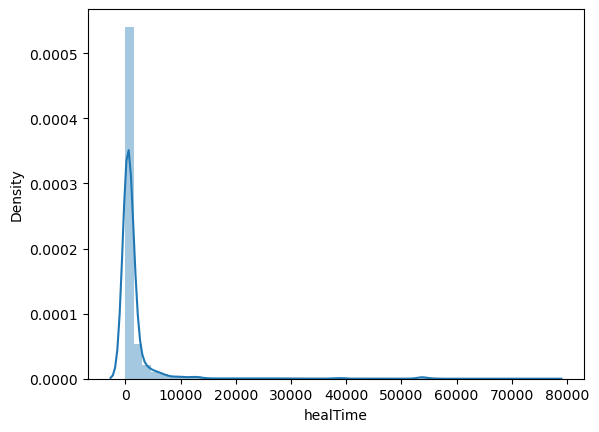

In [13]:
sns.distplot(df['healTime'])

In [14]:
df["alertClass"].value_counts()

Network          4170
Others           2467
Compute          1660
Application      1217
Environment       135
Data              118
Tools             107
Communication      64
Cloud              62
Name: alertClass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='alertClass'>

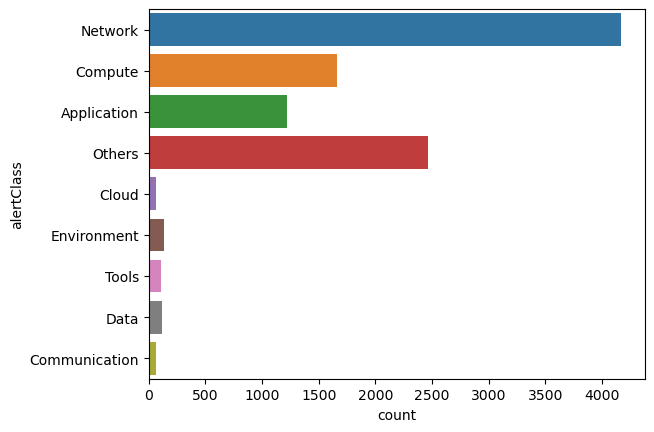

In [15]:
sns.countplot(data=df, y=df["alertClass"])

In [16]:
df["alertSubClass"].value_counts()

Switch                     2594
Others                     2467
Operating System           1247
Wireless                    855
Third Party Application     618
Web Service                 544
Firewall                    410
Virtualization              404
Router                      252
Power                       135
Monitoring                  132
Infra Application            90
Backup                       63
Voice                        61
Generic Device               41
Database                     35
Storage                      20
SDWAN                        14
Hardware                     11
Cloud Instance                4
Collaboration                 3
Name: alertSubClass, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='alertSubClass'>

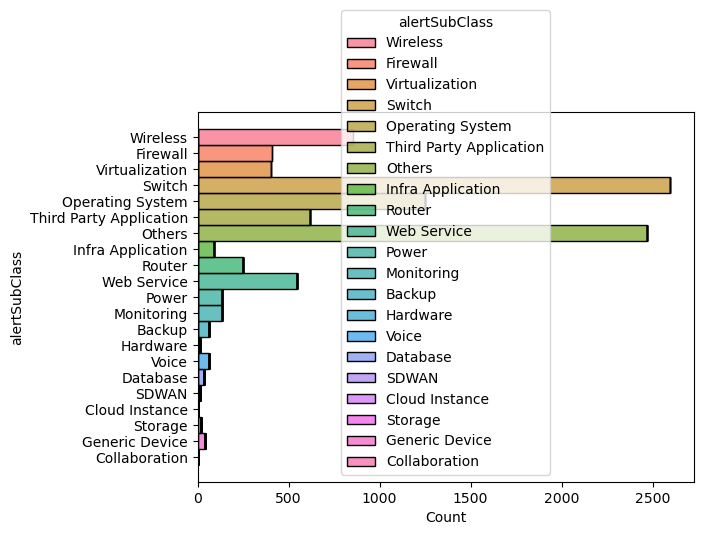

In [17]:
sns.histplot(data=df, y="alertSubClass", hue="alertSubClass", multiple="stack")

In [18]:
df["alertCategory"].value_counts()

Others                2467
Connectivity          2326
Device Status         2064
Device Health         1230
Application Health    1074
Network Interface      407
Application Status     398
Device Management       31
VOIP Link                2
Resource Status          1
Name: alertCategory, dtype: int64

<AxesSubplot:xlabel='alertCategory', ylabel='Count'>

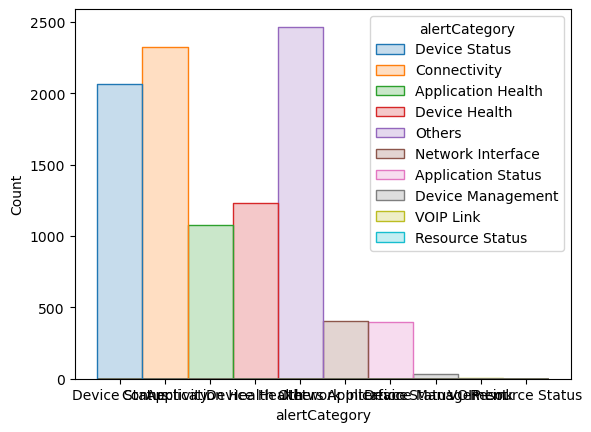

In [19]:
sns.histplot(df, x="alertCategory", hue="alertCategory", element="step")

In [20]:
df["alertSubCategory"].value_counts()

Others                             2467
Monitoring Failure                 1902
Device Down                         952
AP Down                             716
Third Party Application Service     618
                                   ... 
Management Connectivity               1
Resource Down                         1
High Availability                     1
Storagecraft Service Stopped          1
Opsramp Gateway Status                1
Name: alertSubCategory, Length: 69, dtype: int64

In [21]:
print(df["alert_autoheal"].shape)
df["alert_autoheal"].value_counts() # here we got to know we have class imbalance

(10000,)


True     8746
False    1254
Name: alert_autoheal, dtype: int64

### check whether we have duplicate or not

In [22]:
duplicats = df[df.duplicated()]
duplicats.shape

(4762, 10)

In [23]:
df.drop_duplicates(inplace=True)
df.shape

(5238, 10)

### LabelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory']] = \
df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory']].apply(enc.fit_transform)
df.head()

/tmp/ipykernel_850048/3357186167.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory']] = \


,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836,Ok,2,3,60,6,20,5,2,True
1,376,Ok,2,0,60,6,4,5,18,True
2,376,Ok,2,0,180,3,17,5,18,True
3,1987,Ok,2,1,240,6,15,2,38,True
4,376,Ok,2,0,59,3,9,5,18,True


In [25]:
df.shape

(5238, 10)

## spliting the data in target and independent column

In [26]:
X = df.drop(["currentState", "alert_autoheal"],axis=1)
y = df.alert_autoheal
X.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
0,836,2,3,60,6,20,5,2
1,376,2,0,60,6,4,5,18
2,376,2,0,180,3,17,5,18
3,1987,2,1,240,6,15,2,38
4,376,2,0,59,3,9,5,18


In [27]:
# checking whether Label Encoder worker properly or not
X["alertClass"].value_counts()

6    1671
7    1575
3     962
0     657
5     109
4     105
1      54
2      53
8      52
Name: alertClass, dtype: int64

In [28]:
X["priority"].value_counts()

1    2323
2    1627
0     962
3     326
Name: priority, dtype: int64

### Spliting the data in ```Train and test```

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=142)

In [30]:
len(X_train), len(X_test)

(3666, 1572)

In [31]:
y_train.tail(2)

8703    True
464     True
Name: alert_autoheal, dtype: bool

In [32]:
len(y_train), len(y_test)

(3666, 1572)

### checking the model accuracy with imbalance classes

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9586513994910941


col_0,False,True
alert_autoheal,,
False,311,37
True,28,1196


# Data Imbalance correction

In [35]:
#pip install imblearn

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [37]:
X_smote, y_smote = smote.fit_resample(X.astype('float'),y) # without floating value accuracy will decrease

In [38]:
y_smote.value_counts()

True     4113
False    4113
Name: alert_autoheal, dtype: int64

In [39]:
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(y_smote))

Before SMOTE : Counter({True: 4113, False: 1125})
After SMOTE : Counter({True: 4113, False: 4113})


In [40]:
X_smote.columns

Index(['subject', 'repeatCount', 'priority', 'healTime', 'alertClass',
       'alertSubClass', 'alertCategory', 'alertSubCategory'],
      dtype='object')

### check duplicates after balancing 

In [41]:
smote_dup = X_smote[X_smote.duplicated()]
smote_dup.shape

(0, 8)

### Spliting data after balance it

In [42]:
from sklearn.model_selection import train_test_split
X_train_smote,X_test_smote, y_train_smote,y_test_smote = \
train_test_split(X_smote,y_smote,test_size=0.3,random_state=142)

In [43]:
X_train_smote.columns

Index(['subject', 'repeatCount', 'priority', 'healTime', 'alertClass',
       'alertSubClass', 'alertCategory', 'alertSubCategory'],
      dtype='object')

In [44]:
len(X_train_smote["healTime"]) # I'm checking here whether it has increased healTime's values or not

5758

In [45]:
len(X_train_smote), len(X_test_smote)

(5758, 2468)

In [46]:
len(y_train_smote),len(y_test_smote)

(5758, 2468)

In [47]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_smote)
print(accuracy_score(y_test_smote,y_predict))
pd.crosstab(y_test_smote,y_predict) # Compute a simple cross tabulation of two (or more) factors.

0.9700162074554295


col_0,False,True
alert_autoheal,,
False,1208,30
True,44,1186


## Using classification model for getting ```Auto Heal```

In [48]:
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [49]:
import pickle
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

rbf = radial basis function kernel

In [50]:
models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

In [51]:
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'RandomForestClassifier',
             'DecisionTree',
             'GradientBoostingClassifier',
             'GaussianNB']

acc =[]
Precision = []
Recall = []
F1 = []
report = []
val_ac = {}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(X_train_smote,y_train_smote)
    pred=classification_model.predict(X_test_smote)
    acc.append(accuracy_score(pred,y_test_smote))
    Precision.append(precision_score(pred, y_test_smote))
    Recall.append(recall_score(pred, y_test_smote))
    F1.append(f1_score(pred, y_test_smote))
    report.append(classification_report(pred, y_test_smote))
    
    
     
val_acc={'Modelling Algorithm':model_names,'Accuracy':acc, "Precision":Precision, "Recall":Recall, "F1":F1}
val_acc

/home/sangramdh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sangramdh/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.976904376012966,
  0.9266612641815235,
  0.910453808752026,
  0.9700162074554295,
  0.9987844408427877,
  1.0,
  1.0,
  0.8991085899513777],
 'Precision': [0.9772357723577236,
  0.9333333333333333,
  0.9479674796747968,
  0.9642276422764228,
  0.9983739837398374,
  1.0,
  1.0,
  0.9658536585365853],
 'Recall': [0.9764419171405362,
  0.9206094627105053,
  0.8813303099017384,
  0.975328947368421,
  0.9991863303498779,
  1.0,
  1.0,
  0.8516129032258064],
 'F1': [0.9768386834620074,
  0.9269277351635044,
  0.9134351743047395,
  0.9697465249386754,
  0.9987799918666125,
  1.0,
  1.0,
  0.9051428571428571]}

In [52]:
acc_table=pd.DataFrame(val_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy,Precision,Recall,F1
5,DecisionTree,1.000000,1.000000,1.000000,1.000000
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier,0.998784,0.998374,0.999186,0.998780
0,LogisticRegression,0.976904,0.977236,0.976442,0.976839
3,KNearestNeighbors,0.970016,0.964228,0.975329,0.969747
1,LinearSVM,0.926661,0.933333,0.920609,0.926928
2,rbfSVM,0.910454,0.947967,0.881330,0.913435
7,GaussianNB,0.899109,0.965854,0.851613,0.905143


#### Accuracy comparession

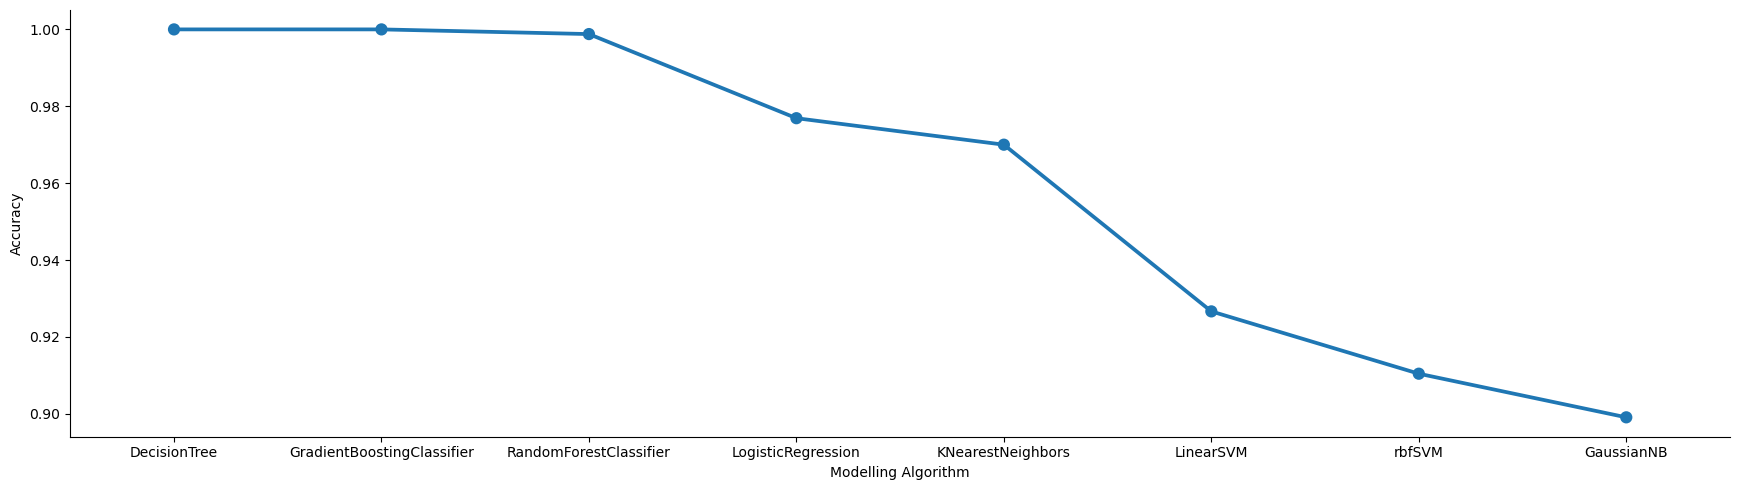

In [53]:
sns.catplot(x='Modelling Algorithm',y='Accuracy',data=acc_table,kind='point',aspect=3.5)

<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algorithm'>

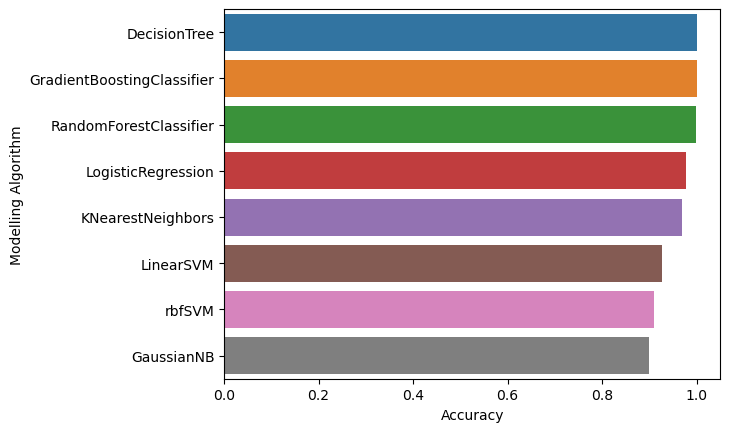

In [54]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

#### Precision comparession

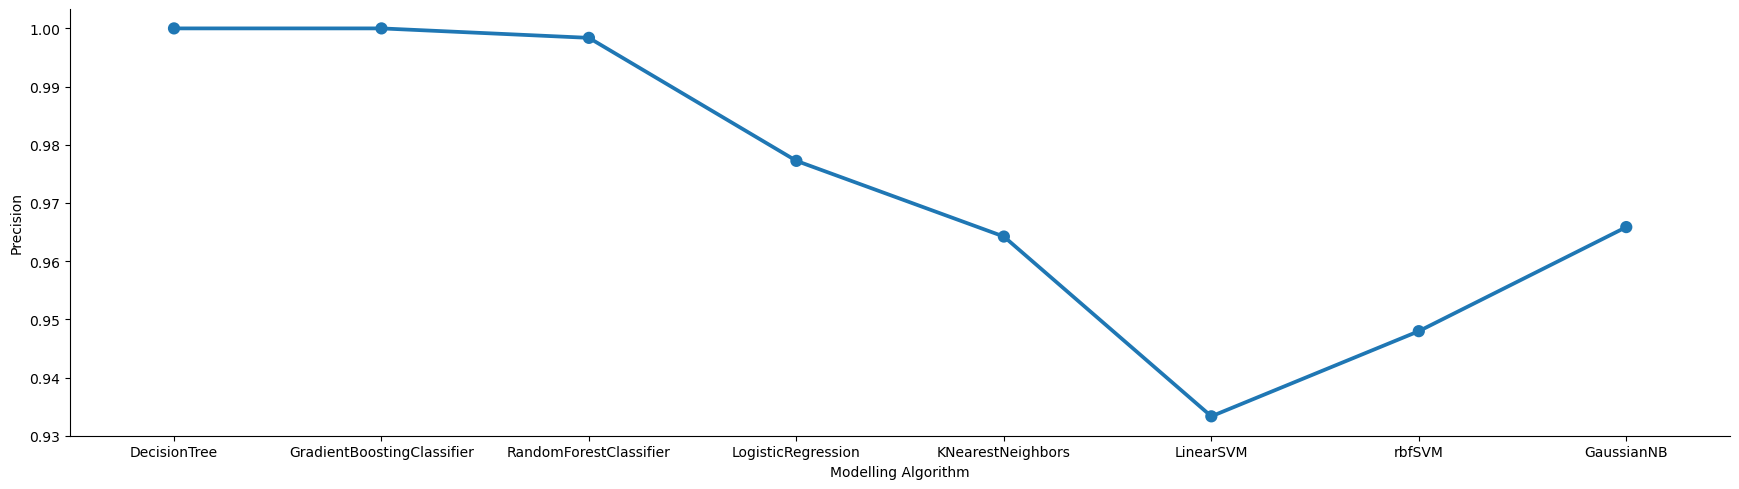

In [55]:
sns.catplot(x='Modelling Algorithm',y='Precision',data=acc_table,kind='point',aspect=3.5)

#### Recall comparision

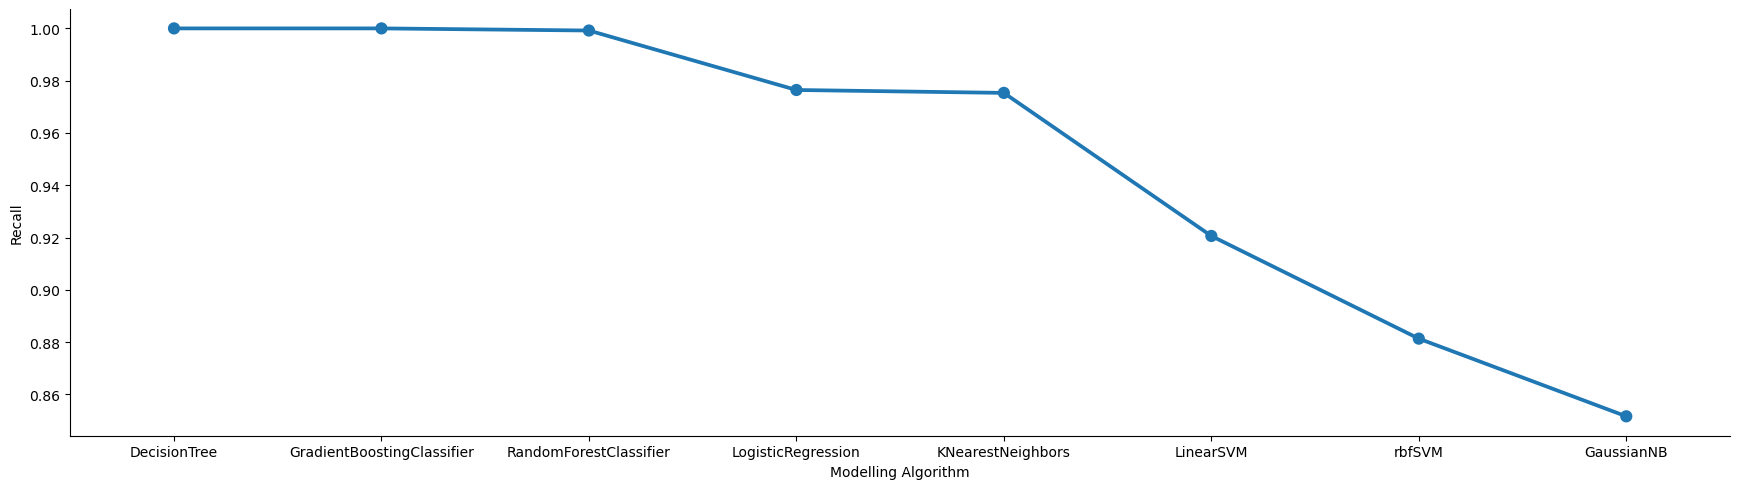

In [56]:
sns.catplot(x='Modelling Algorithm',y='Recall',data=acc_table,kind='point',aspect=3.5)

#### F1 comparession

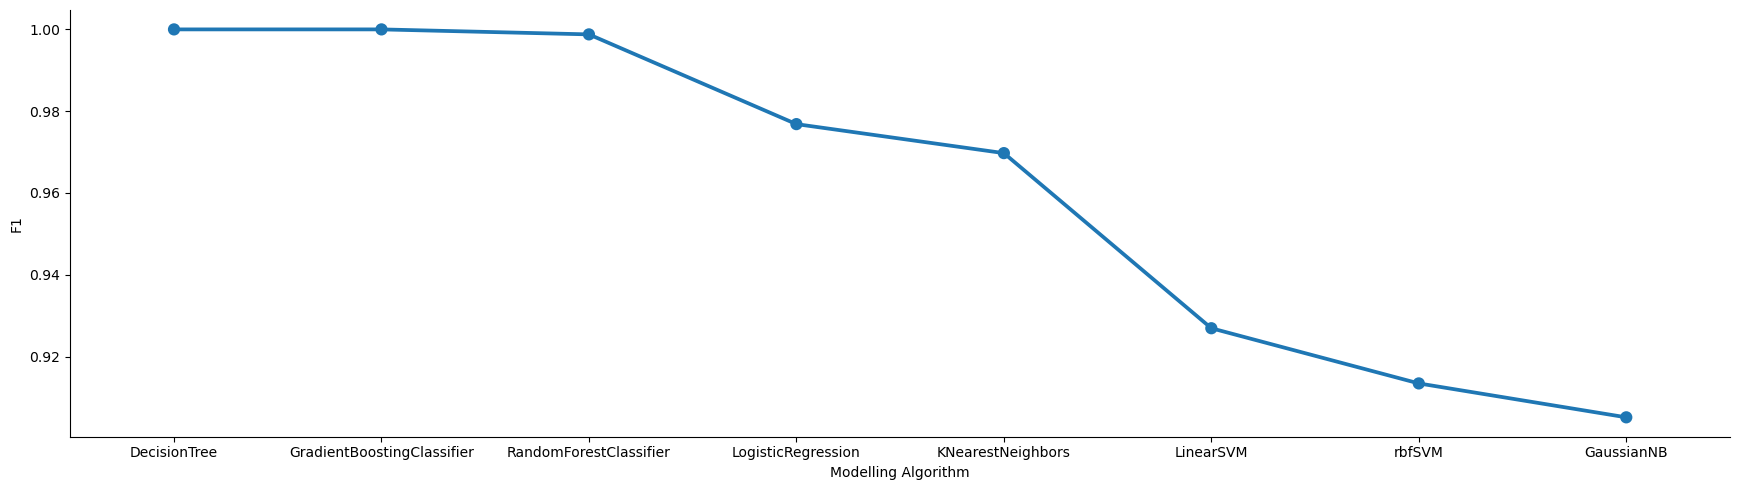

In [57]:
sns.catplot(x='Modelling Algorithm',y='F1',data=acc_table,kind='point',aspect=3.5)

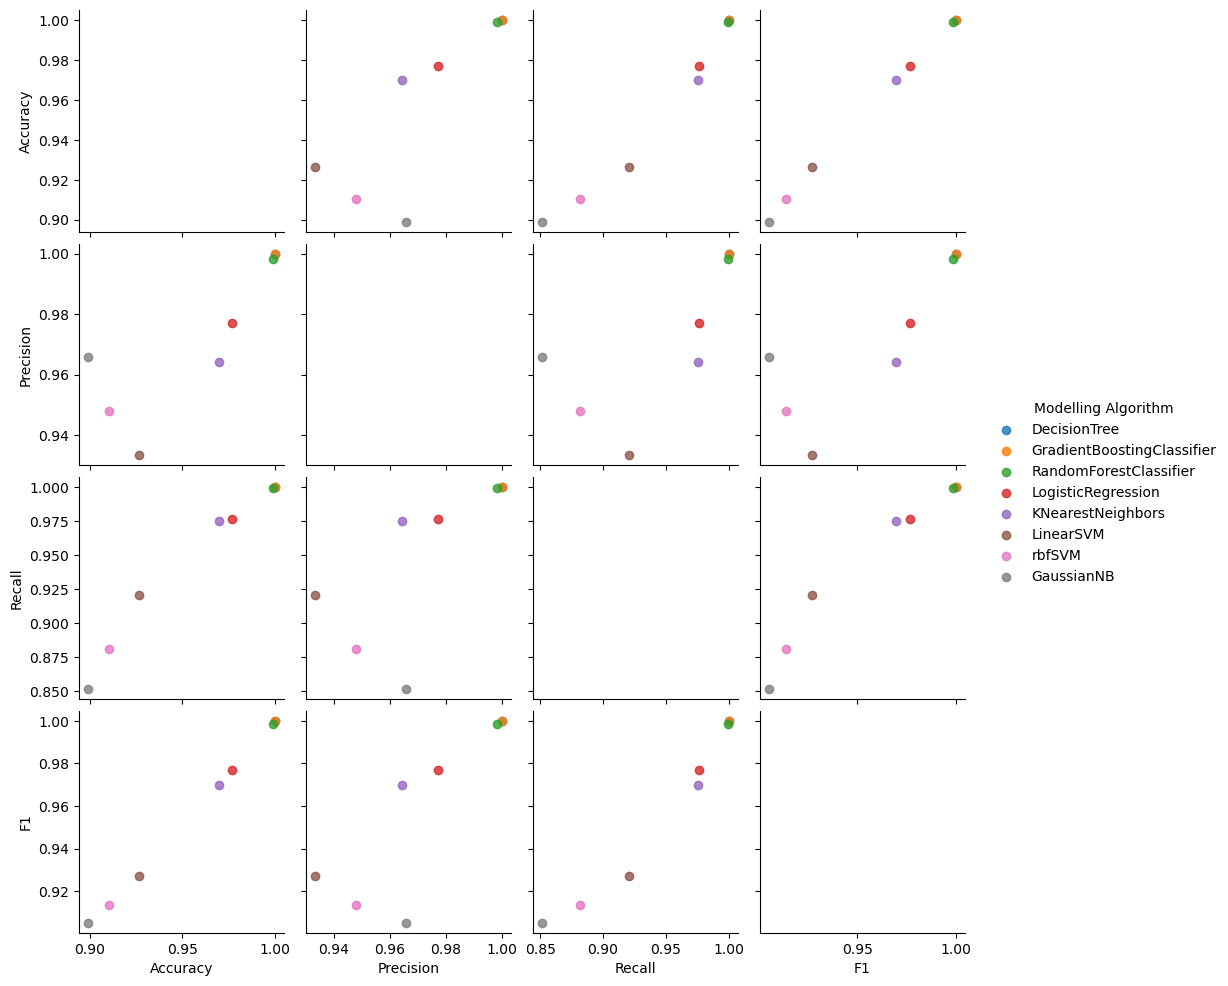

In [58]:
sns.pairplot(data=acc_table, hue='Modelling Algorithm', kind='reg') #'scatter', 'kde', 'hist', 'reg'

In [59]:
for i in report:
    print(i)

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1237
        True       0.98      0.98      0.98      1231

    accuracy                           0.98      2468
   macro avg       0.98      0.98      0.98      2468
weighted avg       0.98      0.98      0.98      2468

              precision    recall  f1-score   support

       False       0.92      0.93      0.93      1221
        True       0.93      0.92      0.93      1247

    accuracy                           0.93      2468
   macro avg       0.93      0.93      0.93      2468
weighted avg       0.93      0.93      0.93      2468

              precision    recall  f1-score   support

       False       0.87      0.94      0.91      1145
        True       0.95      0.88      0.91      1323

    accuracy                           0.91      2468
   macro avg       0.91      0.91      0.91      2468
weighted avg       0.91      0.91      0.91      2468

              preci

In [60]:
# import pickle
# saved_model = pickle.dumps(knn)
# knn_from_pickle = pickle.loads(saved_model)
# knn_from_pickle.predict(X_test_smote)

In [61]:
f

NameError: name 'f' is not defined

### checking outlier on ```healTime``` column

In [ ]:
X_smote["healTime"].tail(3)

In [ ]:
# Box plot
sns.boxplot(x=X_smote["healTime"])

In [ ]:
# Violinplot
sns.violinplot(x=X_smote["healTime"])

In [ ]:
# descriptive statistics of healTime
a = df["healTime"].describe()
b = X_smote["healTime"].describe()
print(a,'\n', b)

In [ ]:
# Checking frequency of subcatagory under
c = df["healTime"].value_counts()
d = X_smote["healTime"].value_counts()
print(c, "\n", d)

In [ ]:
# Checking lessthan 1
e = (df["healTime"]<= 1).value_counts()
f = (X_smote["healTime"]<= 1).value_counts()
print(e,"\n", f)

In [ ]:
# Checking Greaterthan 60000
g = (df["healTime"]<= 60000).value_counts()
h = (X_smote["healTime"]<= 60000).value_counts()
print(g, "\n", h)

## Feature Selection

In [ ]:
sns.heatmap(df.corr(), annot=True) # 'pearson', 'kendall', 'spearman'

In [ ]:
from scipy.stats import pearsonr

def get_correlation(column1, column2, X_smote):
    pearson_corr, p_value = pearsonr(X_smote[column1], X_smote[column2])
    print(f"Correlation b/w {column1} and {column2} is {pearson_corr}")
    print(f"P-value of this correlation is {p_value}")

In [ ]:
get_correlation('healTime','alert_autoheal', df)

In [ ]:
sns.heatmap(X_smote.corr(), annot=True)

In [ ]:
get_correlation('healTime','alertCategory', X_smote)

```Variance Inflation Factor (VIF) is a metric used to detect the presence of multicollinearity in regression models. High VIF values indicate that there is a high degree of correlation between predictor variables, which can lead to unstable and unreliable coefficient estimates in the regression model.```